In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [7]:
IMAGE_SIZE = 256
CHANNELS = 3

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        save_to_dir="./Aug2/"
)

Found 1506 images belonging to 3 classes.


In [9]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [10]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[0.578215   0.57429343 0.6370386 ]
  [0.5648939  0.56097233 0.6237175 ]
  [0.5484974  0.5445758  0.6073209 ]
  ...
  [0.6902668  0.68242365 0.73340404]
  [0.6906852  0.6828421  0.7338225 ]
  [0.6911037  0.68326056 0.73424095]]

 [[0.5777966  0.573875   0.6366201 ]
  [0.56865984 0.5647383  0.62748337]
  [0.54766047 0.5437389  0.606484  ]
  ...
  [0.69353837 0.68569523 0.7366757 ]
  [0.6885171  0.68067396 0.73165435]
  [0.6834958  0.6756527  0.7266331 ]]

 [[0.5773782  0.57345665 0.63620174]
  [0.5724258  0.5685042  0.6312493 ]
  [0.54682356 0.542902   0.6056471 ]
  ...
  [0.6473436  0.63950044 0.6904808 ]
  [0.6519465  0.64410335 0.69508374]
  [0.6565493  0.64870614 0.6996865 ]]

 ...

 [[0.49289402 0.46936458 0.51642346]
  [0.49122024 0.46769083 0.51474965]
  [0.4895465  0.4660171  0.5130759 ]
  ...
  [0.4120859  0.40420496 0.45520422]
  [0.47837195 0.46269268 0.5175911 ]
  [0.49011844 0.47443217 0.5293341 ]]

 [[0.45036554 0.42683613 0.47389495]
  [0.4436705  0.4201411  0.46719992]


In [12]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [13]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [14]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

2023-09-13 15:33:29.037982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-13 15:33:29.038190: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-13 15:33:29.038529: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2023-09-13 15:33:29.040186: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
1506/32

47.0625

In [18]:
215/32

6.71875

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=25,
)

2023-09-13 15:33:50.539959: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-09-13 15:33:50.554720: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2299965000 Hz


Epoch 1/25
47/47 [==============================] - 209s 4s/step - loss: 0.8739 - accuracy: 0.5570 - val_loss: 0.8117 - val_accuracy: 0.6250
Epoch 2/25
47/47 [==============================] - 269s 6s/step - loss: 0.7177 - accuracy: 0.6554 - val_loss: 0.6718 - val_accuracy: 0.6562
Epoch 3/25
47/47 [==============================] - 176s 4s/step - loss: 0.5649 - accuracy: 0.7415 - val_loss: 0.5060 - val_accuracy: 0.7604
Epoch 4/25
47/47 [==============================] - 211s 4s/step - loss: 0.4509 - accuracy: 0.7978 - val_loss: 0.4929 - val_accuracy: 0.7708
Epoch 5/25
47/47 [==============================] - 217s 5s/step - loss: 0.4492 - accuracy: 0.8012 - val_loss: 0.4282 - val_accuracy: 0.8125
Epoch 6/25
47/47 [==============================] - 253s 5s/step - loss: 0.3214 - accuracy: 0.8806 - val_loss: 0.2825 - val_accuracy: 0.8802
Epoch 7/25
47/47 [==============================] - 257s 5s/step - loss: 0.2502 - accuracy: 0.9016 - val_loss: 0.2682 - val_accuracy: 0.9010
Epoch 8/25
47

In [20]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 19s 1s/step - loss: 0.1079 - accuracy: 0.9582


In [21]:
scores


[0.10793828964233398, 0.9582366347312927]

In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 47}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
type(history.history['loss'])

list

In [26]:
len(history.history['loss'])

25

In [27]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8738685846328735,
 0.7176558375358582,
 0.5648962259292603,
 0.45091813802719116,
 0.4492165148258209]

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [29]:
val_acc

[0.625,
 0.65625,
 0.7604166865348816,
 0.7708333134651184,
 0.8125,
 0.8802083134651184,
 0.9010416865348816,
 0.921875,
 0.71875,
 0.9375,
 0.9375,
 0.921875,
 0.8958333134651184,
 0.8958333134651184,
 0.9375,
 0.921875,
 0.9166666865348816,
 0.9635416865348816,
 0.9791666865348816,
 0.9270833134651184,
 0.9583333134651184,
 0.96875,
 0.96875,
 0.6979166865348816,
 0.96875]

In [30]:
acc

[0.5569877624511719,
 0.6553595662117004,
 0.7415196895599365,
 0.7978290319442749,
 0.8012211918830872,
 0.8805969953536987,
 0.9016281962394714,
 0.9185888767242432,
 0.9084124565124512,
 0.9023066759109497,
 0.9552238583564758,
 0.9667571187019348,
 0.8819538950920105,
 0.9151967167854309,
 0.9389416575431824,
 0.9511533379554749,
 0.9518317580223083,
 0.9667571187019348,
 0.9715061187744141,
 0.9606512784957886,
 0.9552238583564758,
 0.9816824793815613,
 0.9721845388412476,
 0.9850746393203735,
 0.9301221370697021]

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


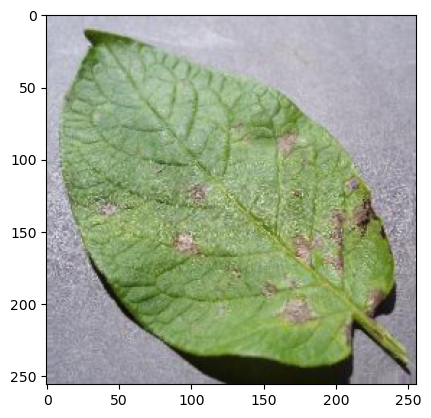

In [35]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

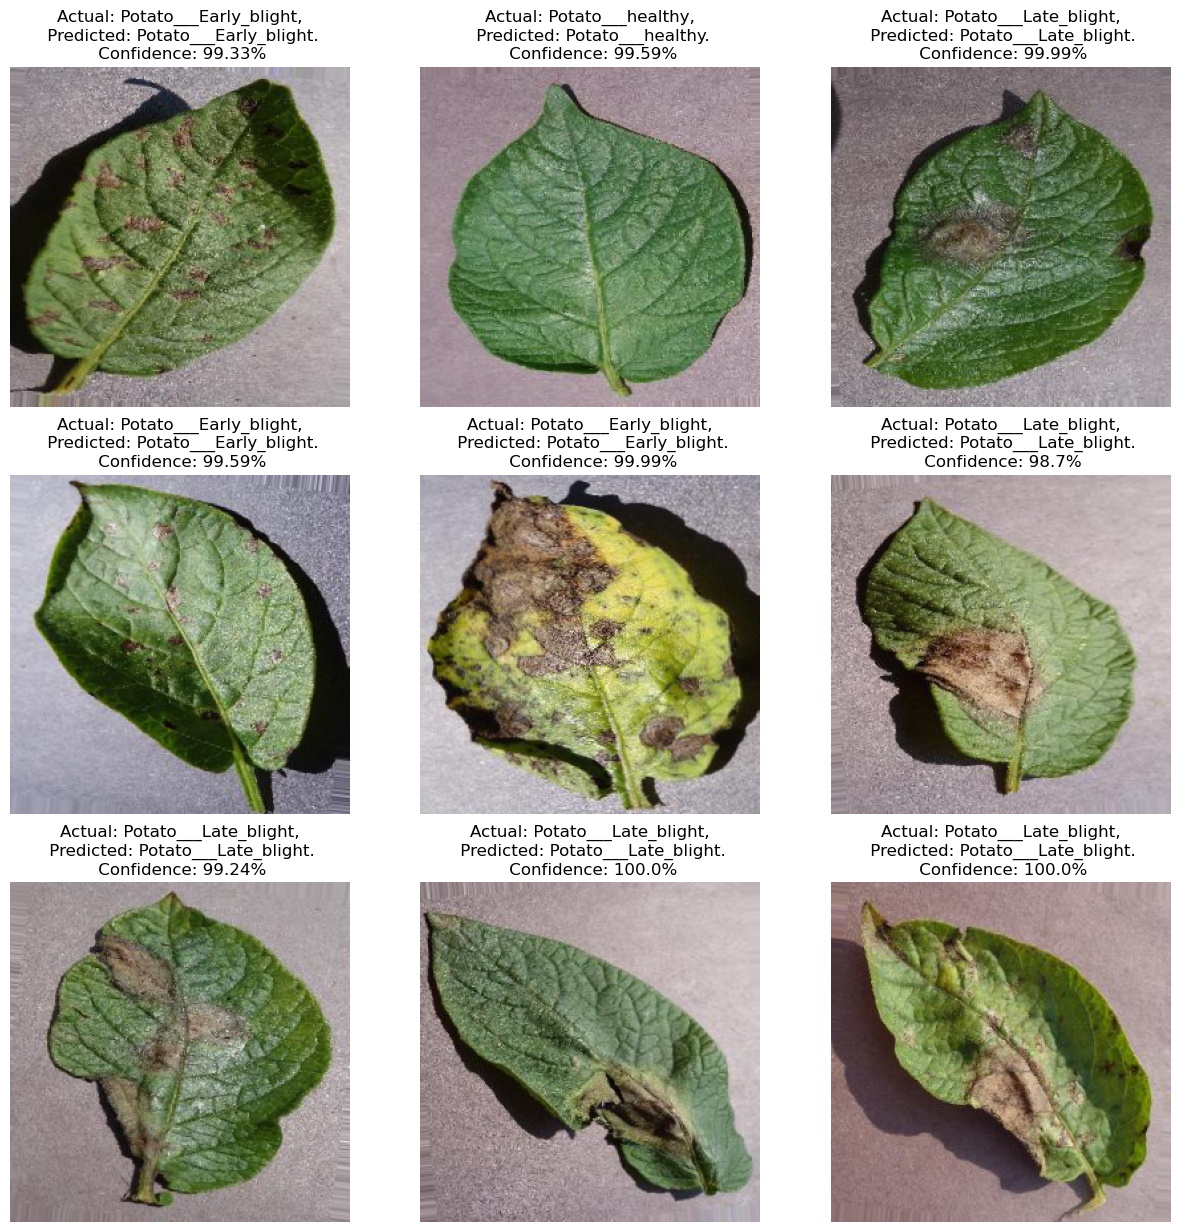

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [38]:
model.save("../potatoes.h5")